<a href="https://colab.research.google.com/github/nesaitfirullail/PCVK_Genap_2023/blob/main/Week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [49]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import argparse
import matplotlib.pyplot as plt
import numpy as np
import glob
from math import *


**1. Gamma Correction**

 Gamma Correction pada citra 
----------------------------------
Masukkan nilai Gamma: 3


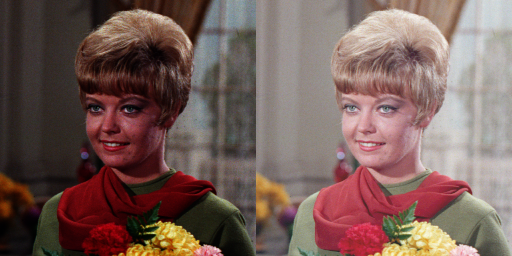

-1

In [10]:
print(' Gamma Correction pada citra ') 
print('----------------------------------') 
try: 
  gamma = int(input('Masukkan nilai Gamma: ')) 
except ValueError: 
  print('Error, not a number') 

original = cv.imread('/content/drive/MyDrive/PCVK_Genap/Images/female.tiff')
gamma_image = np.zeros(original.shape, original.dtype)

def gammaCorrection(src, gamma):
    invGamma = 1 / gamma

    table = [((i / 255) ** invGamma) * 255 for i in range(256)]
    table = np.array(table, np.uint8)

    return cv.LUT(src, table)

gammaImg = gammaCorrection(original, gamma)

final_frame = cv.hconcat((original, gammaImg))
cv2_imshow(final_frame)
cv.waitKey(0)

# def adjust_gamma(image, gamma=1.0):
#   invGamma = 1.0 / gamma
#   table = np.array([((i / 255.0 ) ** invGamma) * 255
#       for i in np.arange(0,256)]).astype("uint8")

#   return cv.LUT(image, table)

# ap = argparse.ArgumentParser()
# ap.add_argument("-i", "--image", required=True,
#     help="path to input image")
# args = vars(ap.parse_args())

# original = cv.imread(args["image"])

# for gamma in np.arrange(0.0, 3.5, 0.5):
#   if gamma == 1:
#     continue

  # gamma = gamma if gamma > 0 else 0.1
  # adjusted = adjust_gamma(original, gamma=gamma)
  # cv.putText(adjusted, "g={}".format(gamma), (10,30), cv.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 255), 3)
  # cv.imshow("Images", np.hstack([original, adjusted]))
  # cv.waitKey(0)

**2. Bit Depth**

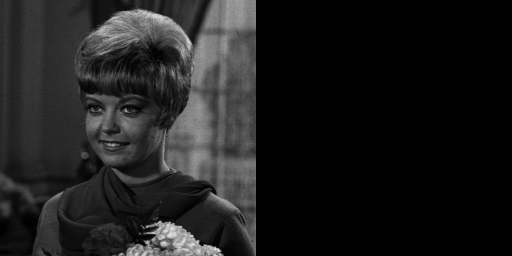

In [30]:
bit_depth=2
level = 255 / (pow(2,bit_depth)-1)
original = cv.imread('/content/drive/MyDrive/PCVK_Genap/Images/female.tiff', cv.IMREAD_GRAYSCALE)
depth_image = np.zeros(original.shape, original.dtype) 

depth_instensity = np.array(256 * depth_image / 0x0fff,
                            dtype=np.uint8)
final_frame = cv.hconcat((original, depth_image))
cv2_imshow(final_frame)
# iio.imwrite(original, depth_instensity)


**3. Average Denoising**

In [87]:
original = cv.imread('/content/drive/MyDrive/PCVK_Genap/Images/galaxy.jpg')
cv_img = [100]
for img in glob.glob('/content/drive/MyDrive/PCVK_Genap/Images/noises/*.jpg'):
  n = cv.imread(img)
  cv_img.append

dst = cv_img[0]
noise_number = 80
for i in range(noise_number):
  if i == 0:
    pass
  else:
    alpha = 1.0/(i+1)
    beta = 1.0-alpha
    dst = cv.addWeighted(cv_img[0], alpha, dst, beta, 0.0)

def PSNR(original, compressed):
  mse = np.mean((original - compressed)**2)
  if(mse == 0):
    return 100
  max_pixel = 255.0
  psnr = 20 * log10(max_pixel / sqrt(mse)) 
  return psnr

compressed = dst
psnr = PSNR(original, compressed)

print('Nilai PSNR adalah ', psnr, '(dB)')
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)

ValueError: ignored

**4. Masking**

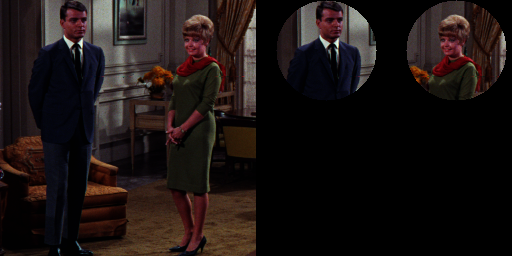

In [82]:
image = cv.imread('/content/drive/MyDrive/PCVK_Genap/Images/couple.tiff')

mask = np.zeros(image.shape[:2], dtype="uint8")
cv.circle(mask, (70, 50), 50, 255, -1)
cv.circle(mask, (200, 50), 50, 255, -1)
masked = cv.bitwise_and(image, image, mask=mask)
# show the output images
final_frame = cv.hconcat((image, masked))
cv2_imshow(final_frame)
# cv.imshow("Circular Mask", mask)
# cv.imshow("Mask Applied to Image", masked)
# cv.waitKey(0)

**5.**

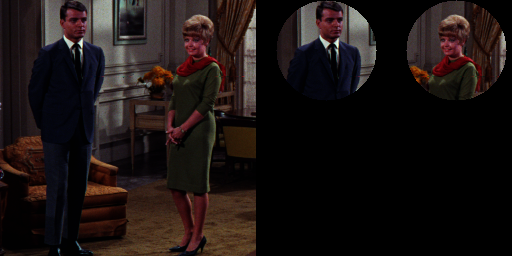

In [88]:
image = cv.imread('/content/drive/MyDrive/PCVK_Genap/Images/couple.tiff')

mask = np.zeros(image.shape[:2], dtype="uint8")
cv.circle(mask, (70, 50), 50, 255, -1)
cv.circle(mask, (200, 50), 50, 255, -1)
masked = cv.bitwise_and(image, image, mask=mask)
# show the output images
final_frame = cv.hconcat((image, masked))
cv2_imshow(final_frame)
# cv.imshow("Circular Mask", mask)
# cv.imshow("Mask Applied to Image", masked)
# cv.waitKey(0)